[5.8664, -55.1668]



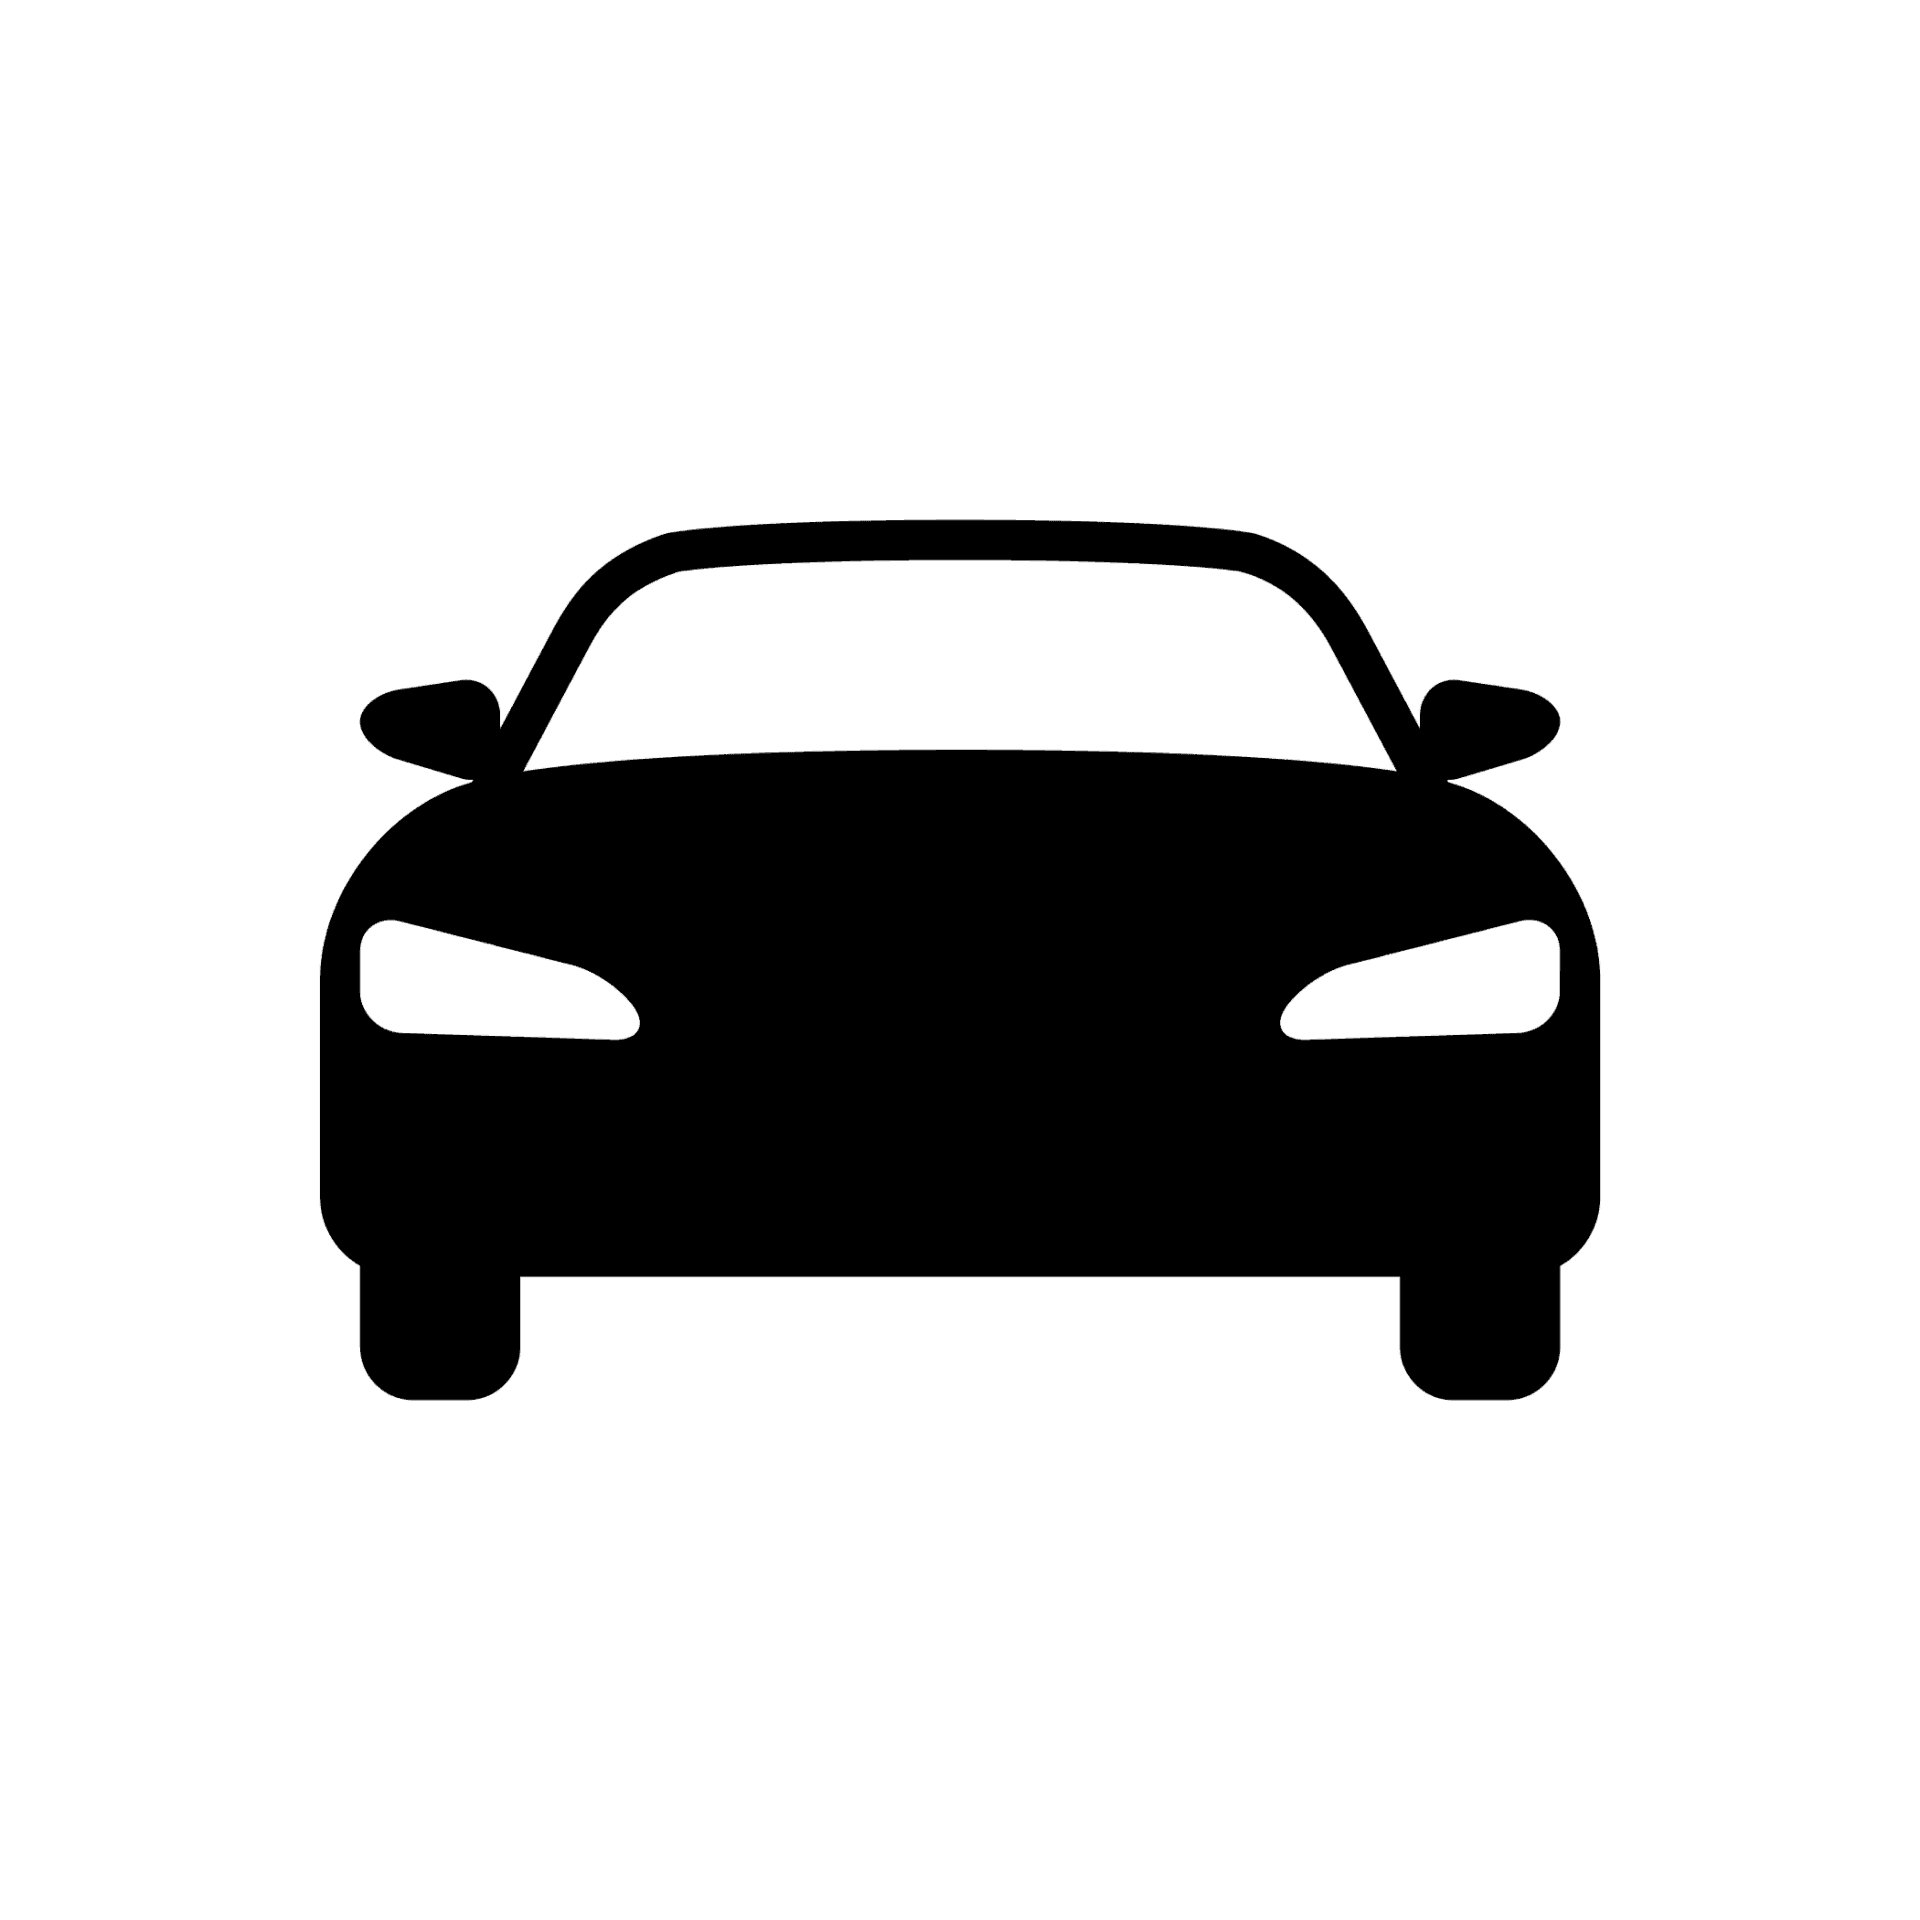

In [11]:
import folium
import requests

from CurrentPosition import CurrentPosition

currentPosition = CurrentPosition().get_current_location3()

print(currentPosition)
m = folium.Map(location=currentPosition, zoom_start=14)

def agregar_marcador(event):
    folium.Marker(location=currentPosition).add_to(m)
    
# customIcon = folium.CustomIcon("D:/UdC/SD/Maps2/Maps/src/img/car2.png", icon_size=(50, 50))
# folium.Marker(location=currentPosition, icon=customIcon).add_to(m)
# m.add_child(folium.ClickForMarker("<b>Lat:</b> ${currentPosition[0]}<br /><b>Lon:</b> ${currentPosition[1]}"))


# # Coordenadas de los puntos de la ruta
# ruta = [(37.7749, -122.4194), (34.0522, -118.2437), (40.7128, -74.0060)]

# # Crear un objeto Map
# m = folium.Map(location=ruta[0], zoom_start=12)

# # Crear un objeto PolyLine
# polyline = folium.PolyLine(locations=ruta, color='blue', weight=2)

# # Agregar el objeto PolyLine al mapa
# m.add_child(polyline)

# Coordenadas de inicio y fin de la ruta
inicio = str(currentPosition[0])+","+str(currentPosition[1])  # Dirección o coordenadas del punto de inicio
fin = "5.101407, -54.551658"  # Dirección o coordenadas del punto de fin

# Configurar los parámetros de la solicitud HTTP
params = {
    "key": "32efpKKQxCSJchjYCMwAuREIB7ywAOAd",  # Reemplaza con tu propia clave de API de MapQuest
    "from": inicio,
    "to": fin,
    "routeType": "fastest"
}

# Realizar la solicitud HTTP a la API de MapQuest
response = requests.get("http://www.mapquestapi.com/directions/v2/route", params=params)

# Obtener la respuesta en formato JSON
data = response.json()

# Obtener las instrucciones de la ruta
instrucciones = data["route"]["legs"][0]["maneuvers"]

# Crear el objeto Map centrado en las coordenadas de inicio
m = folium.Map(location=(instrucciones[0]["startPoint"]["lat"], instrucciones[0]["startPoint"]["lng"]), zoom_start=12)

# Iterar sobre las instrucciones de la ruta
for i in range(len(instrucciones)):
    # Obtener las coordenadas de inicio y fin de la instrucción actual
    lat_inicio = instrucciones[i]["startPoint"]["lat"]
    lng_inicio = instrucciones[i]["startPoint"]["lng"]
    
    # Obtener las coordenadas de inicio de la siguiente instrucción como punto final de la instrucción actual
    if i < len(instrucciones) - 1:
        lat_fin = instrucciones[i + 1]["startPoint"]["lat"]
        lng_fin = instrucciones[i + 1]["startPoint"]["lng"]
    else:
        # Si es la última instrucción, utilizar las coordenadas de inicio como punto final
        lat_fin = lat_inicio
        lng_fin = lng_inicio
    
    # Crear la línea de la instrucción de la ruta
    ruta = folium.PolyLine(locations=[(lat_inicio, lng_inicio), (lat_fin, lng_fin)], color="blue")
    
    # Agregar la línea de la ruta al mapa
    ruta.add_to(m)
    
customIcon = folium.CustomIcon("D:/UdC/SD/Maps2/Maps/src/img/car2.png", icon_size=(50, 50))
folium.Marker(location=currentPosition, icon=customIcon).add_to(m)
folium.Marker(location=[lat_fin, lng_fin]).add_to(m)
m


# # Define la URL de la API y la clave de acceso
# url = 'https://www.mapquestapi.com/directions/v2/route?key=32efpKKQxCSJchjYCMwAuREIB7ywAOAd'

# print(currentPosition[0],",",currentPosition[1])
# # Define el cuerpo de la solicitud POST
# data = {
#     "locations": [
#         "5.842275, -55.193693",
#         "5.809473, -55.225030"
#     ],
#     "options": {
#         "avoids": [],
#         "avoidTimedConditions": False,
#         "doReverseGeocode": True,
#         "shapeFormat": "raw",
#         "generalize": 0,
#         "routeType": "fastest",
#         "timeType": 1,
#         "locale": "en_US",
#         "unit": "m",
#         "enhancedNarrative": False,
#         "drivingStyle": 2,
#         "highwayEfficiency": 21.0
#     }
# }

# # Realiza la solicitud POST a la API
# response = requests.post(url, json=data)

# # Obtén la respuesta JSON
# data = response.json()

# #print(data)

# # Verifica si se encontró una ruta válida
# if data['info']['statuscode'] == 0:
#     # Obtén los puntos de forma de la ruta
#     shape_points = data['route']['shape']['shapePoints']

#     # Crear el objeto Map centrado en la ruta
#     m = folium.Map(location=(shape_points[0], shape_points[1]), zoom_start=12)

#     # Crear una lista de coordenadas para la ruta
#     route_coords = [(shape_points[i], shape_points[i+1]) for i in range(0, len(shape_points), 2)]

#     # Crear un objeto PolyLine con las coordenadas de la ruta
#     route_line = folium.PolyLine(locations=route_coords, color='blue')

#     # Agregar la ruta al mapa
#     route_line.add_to(m)
# m